Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [6]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X
poly = PolynomialFeatures(4)
new_X=poly.fit_transform(X)
new_X




array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.,  16.,
         24.,  36.,  54.,  81.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125., 256.,
        320., 400., 500., 625.]])

In [5]:
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [7]:
poly = PolynomialFeatures(degree=4, interaction_only=True)
poly.fit_transform(X)


array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [8]:
X1=np.array([1,2,3,4]).reshape(4,1)
print(X1)

[[1]
 [2]
 [3]
 [4]]


In [15]:
poly = PolynomialFeatures(3)
poly.fit_transform(X1)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [9]:
poly = PolynomialFeatures(4)
poly.fit_transform(X1)

array([[  1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.],
       [  1.,   3.,   9.,  27.,  81.],
       [  1.,   4.,  16.,  64., 256.]])

In [12]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#importing the dataset
dataset=pd.read_csv('Position_Salaries.csv')

In [20]:
dataset.info

<bound method DataFrame.info of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>

In [14]:
X=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2].values

In [16]:
#fitting the linear regression model to the dataset
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

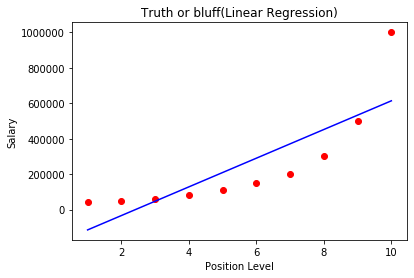

In [17]:
#Visualisng the linear regression model results
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Truth or bluff(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [29]:
#fitting the polynomial regression model to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(X)
print(X_poly)
print(X_poly.shape)

[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]
(10, 4)


In [30]:

lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

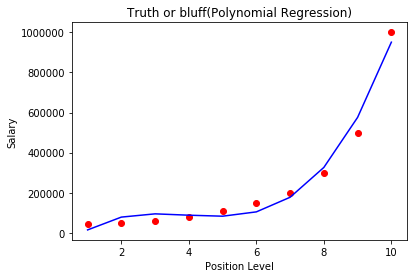

In [31]:
#Visualising the pollynomial regression model results
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color='blue')
plt.title('Truth or bluff(Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [32]:
#predictig the result of linear regression model.
lin_reg.predict( np.array([ [6.5] ]) )

array([330378.78787879])

In [33]:
#predicting the result of polynomial regression.
lin_reg2.predict( poly_reg.fit_transform(np.array([ [6.5] ]) ))

array([133259.46969697])

In [34]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
print(X)

poly = PolynomialFeatures(2)
poly.fit_transform(X)


[[0 1]
 [2 3]
 [4 5]]


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [35]:
from sklearn import datasets
X2,Y2=datasets.load_diabetes(return_X_y=True)

In [36]:
diabetes=datasets.load_diabetes()
print(diabetes.DESCR)
X3=diabetes.data
Y3=diabetes.target


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [37]:
diabetes_X_train = X2[:-20]

diabetes_X_test = Y2[-20:]

# Split the targets into training/testing sets
diabetes_y_train = X2[:-20]
diabetes_y_test = Y2[-20:]
print(diabetes_X_train.shape)

(422, 10)


In [40]:
from sklearn import linear_model

lr=linear_model.LinearRegression()
lr.fit(diabetes_X_train,diabetes_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
##print(lr.coef_)
lr.coef_[0]

#print(lr.intercept_)

array([ 1.00000000e+00, -2.05667657e-16,  8.46815400e-17, -2.98688469e-16,
       -2.10921317e-17,  1.70923956e-16, -1.83169928e-16,  1.57850153e-16,
        1.38483133e-16, -9.24524834e-17])